In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing data

In [79]:
loan = pd.read_csv("loan.csv",encoding = "ISO-8859-1" ,dtype='unicode')

#knowing about data

In [80]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [81]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,...,0.0,0.0,0.0,0.0,39020,39678,0.0,0.0,0.0,0.0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,...,0.0,0.0,0.0,0.0,3,1,0.0,0.0,0.0,0.0
top,788919,259132,10000,10000,5000,36 months,10.99%,311.11,B,B3,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,...,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


In [82]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


#looking for null valued columns

In [83]:
loan.isnull().any()

id                                False
member_id                         False
loan_amnt                         False
funded_amnt                       False
funded_amnt_inv                   False
term                              False
int_rate                          False
installment                       False
grade                             False
sub_grade                         False
emp_title                          True
emp_length                         True
home_ownership                    False
annual_inc                        False
verification_status               False
issue_d                           False
loan_status                       False
pymnt_plan                        False
url                               False
desc                               True
purpose                           False
title                              True
zip_code                          False
addr_state                        False
dti                               False


removing the columns with null values more than 70% as they create uncertainity in analysis

In [84]:
loan=loan.loc[:, loan.isnull().mean() <= 0.70]

In [85]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
id                            39717 non-null object
member_id                     39717 non-null object
loan_amnt                     39717 non-null object
funded_amnt                   39717 non-null object
funded_amnt_inv               39717 non-null object
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null object
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null object
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

#the colums with compleate 0 values are also to be removes

In [86]:
loan = loan.loc[:, (loan != 0).any(axis=0)]

In [87]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
id                            39717 non-null object
member_id                     39717 non-null object
loan_amnt                     39717 non-null object
funded_amnt                   39717 non-null object
funded_amnt_inv               39717 non-null object
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null object
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null object
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

In [88]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0


    dropping url column as it is useless for analysis

In [89]:
loan.drop('url', axis=1, inplace=True)

deleting duplicate rows

In [90]:
loan.drop_duplicates(subset=None, keep='first')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0
5,1075269,1311441,5000,5000,5000,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0,1,INDIVIDUAL,0,0,0,0,0
6,1069639,1304742,7000,7000,7000,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0,1,INDIVIDUAL,0,0,0,0,0
7,1072053,1288686,3000,3000,3000,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0,1,INDIVIDUAL,0,0,0,0,0
8,1071795,1306957,5600,5600,5600,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0,1,INDIVIDUAL,0,0,0,0,0
9,1071570,1306721,5375,5375,5350,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0,1,INDIVIDUAL,0,0,0,0,0


rounding of column values with numbers to level 2 presition

In [42]:
loan['total_rec_int'] = loan['total_rec_int'].apply(lambda x: round(float(x),2))
loan['last_pymnt_amnt'] = loan['last_pymnt_amnt'].apply(lambda x: round(float(x),2))
loan['total_rec_prncp'] = loan['total_rec_prncp'].apply(lambda x: round(float(x),2))
loan['total_pymnt_inv'] = loan['total_pymnt_inv'].apply(lambda x: round(float(x),2))
loan['total_pymnt'] = loan['total_pymnt'].apply(lambda x: round(float(x),2))
loan['dti'] = loan['dti'].apply(lambda x: round(float(x),2))
loan['funded_amnt_inv'] = loan['funded_amnt_inv'].apply(lambda x: round(float(x),2))
loan['installment'] = loan['installment'].apply(lambda x: round(float(x),2))
loan['annual_inc'] = loan['annual_inc'].apply(lambda x: round(float(x),2))

In [43]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0


removing the word 'months' from each row in term column

In [44]:
loan.term = loan.term.str[:3]

In [45]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,...,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,...,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,...,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,...,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,...,67.79,May-16,0,1,INDIVIDUAL,0,0,0,0,0


reming % symbol from the values

In [46]:
loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.rstrip('%').astype('float')

type conversion from object to float

In [47]:
loan['loan_amnt']=loan['loan_amnt'].astype(float)
loan['annual_inc']=loan['annual_inc'].astype(float)

deriving a new column named

In [48]:
loan['loan_amnt_annual_inc_ratio']=round((loan['loan_amnt']*100) /loan['annual_inc'],2)

In [49]:
loan['loan_amnt_annual_inc_ratio']

0        20.83
1         8.33
2        19.59
3        20.33
4         3.75
5        13.89
6        14.89
7         6.25
8        14.00
9        35.83
10        9.03
11       16.00
12       30.00
13       20.00
14       10.00
15        3.57
16       23.81
17        3.27
18        7.14
19       11.89
20       46.69
21       20.00
22       20.00
23       20.00
24        7.89
25       16.30
26       25.00
27       10.00
28        3.77
29       34.00
         ...  
39687    16.00
39688    13.79
39689     6.00
39690    20.42
39691     5.17
39692     2.00
39693    25.93
39694     3.33
39695     5.26
39696    52.08
39697    36.53
39698     6.85
39699    15.94
39700    67.50
39701     7.16
39702    16.67
39703     1.50
39704    12.00
39705     4.17
39706     2.78
39707     2.78
39708    10.42
39709     6.25
39710     5.88
39711     6.67
39712     2.27
39713    47.22
39714     5.00
39715     2.50
39716    34.09
Name: loan_amnt_annual_inc_ratio, Length: 39717, dtype: float64

In [50]:
loan['annual_inc']=loan['annual_inc'].astype(float)
loan['installment']=loan['installment'].astype(float)

In [51]:
loan['monthly_income'] = loan.annual_inc / 12

In [52]:
loan['monthly_installment_monthly_inc_perc'] = round((loan.installment / loan.monthly_income) * 100)

#  As we only want to find out potential defaults, we should remove 'current' from loan status

In [53]:
loan=loan[loan.loan_status !='Current']
loan=loan.loc[:,loan.nunique()!=1]

# # #  till this data cleaning is done

Relationship of Funded Amount with defaults

In [54]:
loan['total_pymnt']=loan['total_pymnt'].astype(float)
loan['funded_amnt']=loan['funded_amnt'].astype(float)

profit and loss column is derived from the data

In [55]:
loan['PnL']=round((loan['total_pymnt']-loan['funded_amnt'])*100/loan['funded_amnt'],2)

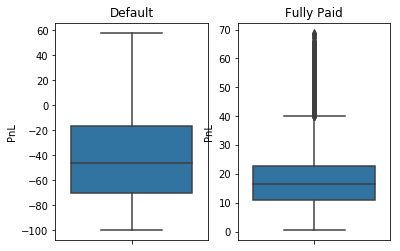

In [56]:
plt.figure(1)

plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=loan[loan.loan_status=='Charged Off'].PnL)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=loan[loan.loan_status=='Fully Paid'].PnL)
plt.show()

In [57]:
loan['loan_inc_ratio']=round(loan.funded_amnt*100/loan.annual_inc,0)

C:\Users\bodla\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


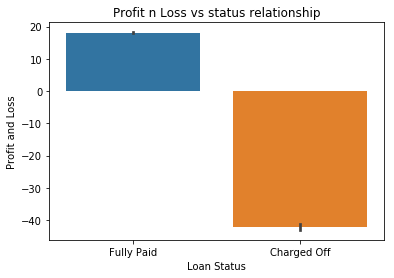

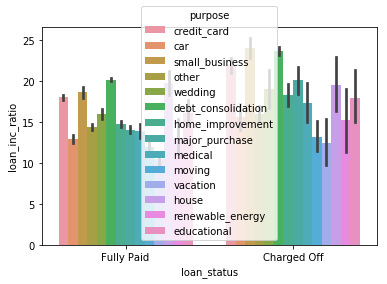

In [58]:
plt.figure(2)
sns.barplot(x='loan_status',y='PnL',data=loan)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")
plt.title("Profit n Loss vs status relationship")
plt.show()
plt.figure(2)
sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=loan)
plt.show()

# Relationship of default with term with a barplot

C:\Users\bodla\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


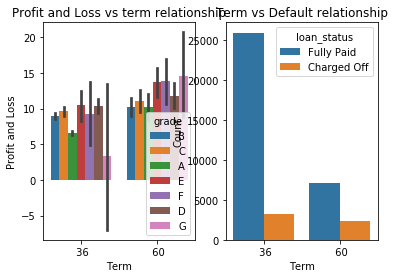

In [59]:
plt.figure(1)
plt.subplot(1,2,1)
sns.barplot(x='term',y='PnL',data=loan,hue='grade')
plt.xlabel("Term")
plt.ylabel("Profit and Loss")
plt.title("Profit and Loss vs term relationship")
plt.subplot(1,2,2)
sns.countplot('term',hue='loan_status',data=loan)
plt.xlabel("Term")
plt.ylabel("Count")
plt.title("Term vs Default relationship")
plt.show()

# Converting employment length (numeric value) to  nominal values

In [60]:
loan.emp_length=loan['emp_length'].replace('10+ years', 10)
loan.emp_length=loan['emp_length'].replace('< 1 year',1)
loan.emp_length=loan['emp_length'].replace('1 year',1)
loan.emp_length=loan['emp_length'].replace('2 years',)
loan.emp_length=loan['emp_length'].replace('3 years',)
loan.emp_length=loan['emp_length'].replace('4 years',)
loan.emp_length=loan['emp_length'].replace('5 years',)
loan.emp_length=loan['emp_length'].replace('6 years',)
loan.emp_length=loan['emp_length'].replace('7 years',)
loan.emp_length=loan['emp_length'].replace('8 years',)
loan.emp_length=loan['emp_length'].replace('9 years',)
loan.emp_length=loan['emp_length'].replace('10 years',)
loan.emp_length=loan['emp_length'].replace('10+ years',)
loan.emp_length=loan['emp_length'].replace('n/a',0)
loan.grade=loan.grade.replace('A',1)
loan.grade=loan.grade.replace('B',2)
loan.grade=loan.grade.replace('C',3)
loan.grade=loan.grade.replace('D',4)
loan.grade=loan.grade.replace('E',5)
loan.grade=loan.grade.replace('F',6)
loan.grade=loan.grade.replace('G',7)

In [61]:
loan.emp_length.dtype

dtype('float64')

In [62]:
loan.grade.dtype

dtype('int64')

In [ ]:
plt.figure(figsize=(15,30))
plt.subplot(2,1,1)
sns.barplot(y='emp_length',x='PnL',data=loan,hue='grade')
plt.xlabel("Emp Length")
plt.ylabel("Funded Amount")
plt.title("Loan amount vs Emp Length relationship")
plt.subplot(2,1,2)
sns.countplot(y='emp_length',hue='loan_status',data=loan)
plt.xlabel("Emp Length")
plt.ylabel("Count")
plt.title("Emp Length vs Default relationship")
plt.show()

C:\Users\bodla\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


C:\Users\bodla\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


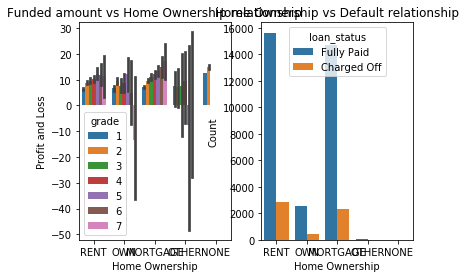

In [63]:
plt.figure(1)
plt.subplot(1,2,1)
sns.barplot(x='home_ownership',y='PnL',data=loan,hue='grade')
plt.xlabel("Home Ownership")
plt.ylabel("Profit and Loss")
plt.title("Funded amount vs Home Ownership relationship")
plt.subplot(1,2,2)
sns.countplot(x='home_ownership',hue='loan_status',data=loan)
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.title("Home Ownership vs Default relationship")
plt.show()


C:\Users\bodla\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


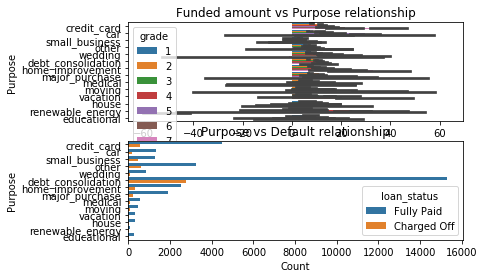

In [64]:
plt.figure(1)
plt.subplot(2,1,1)
sns.barplot(y='purpose',x='PnL',data=loan,hue='grade')
plt.ylabel("Purpose")
plt.xlabel("Profit and Loss")
plt.title("Funded amount vs Purpose relationship")
plt.subplot(2,1,2)
sns.countplot(y='purpose',hue='loan_status',data=loan)
plt.ylabel("Purpose")
plt.xlabel("Count")
plt.title("Purpose vs Default relationship")
plt.show()

C:\Users\bodla\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


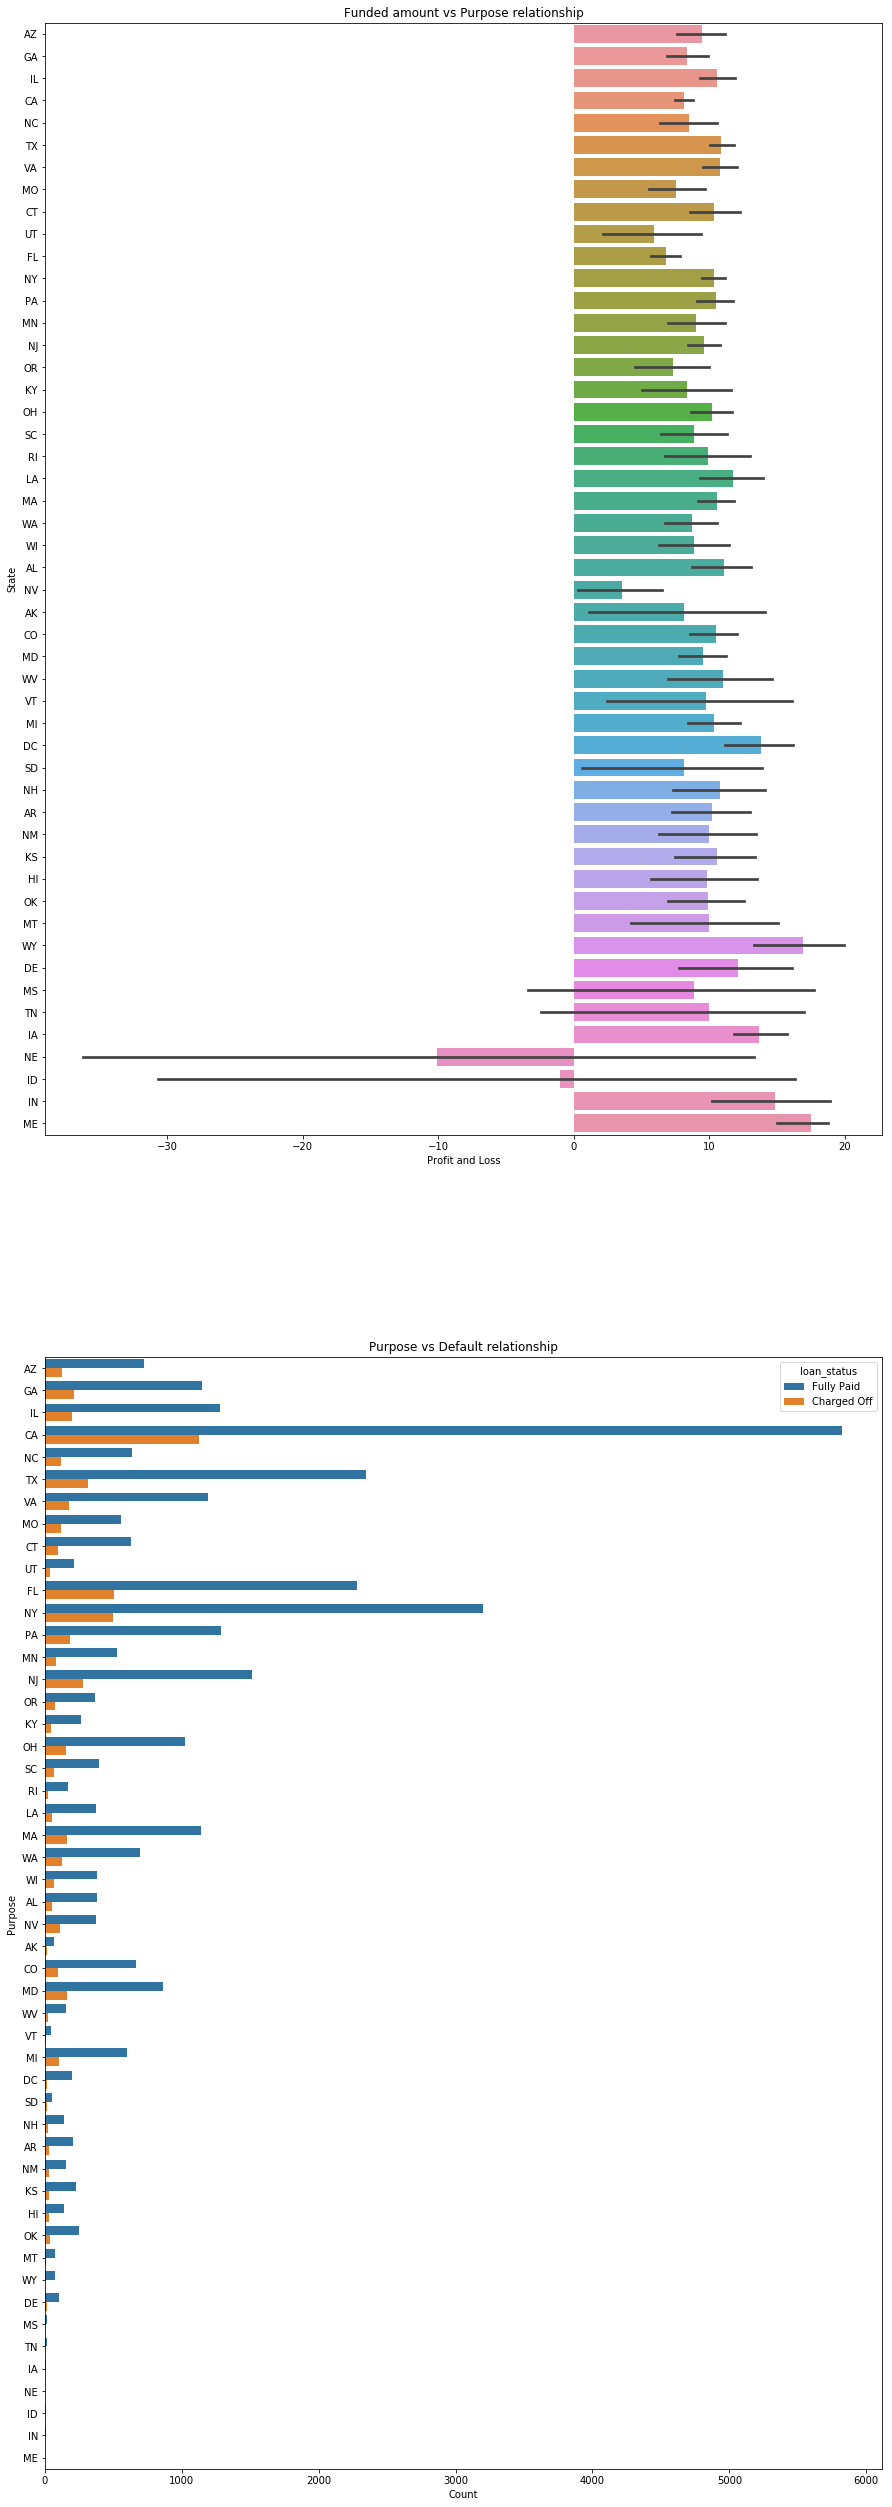

In [65]:
plt.figure(figsize=(15,45))

plt.subplot(2,1,1)
sns.barplot(y='addr_state',x='PnL',data=loan)
plt.ylabel("State")
plt.xlabel("Profit and Loss")

plt.title("Funded amount vs Purpose relationship")


plt.subplot(2,1,2)
sns.countplot(y='addr_state',hue='loan_status',data=loan)
plt.ylabel("Purpose")
plt.xlabel("Count")
plt.title("Purpose vs Default relationship")
plt.show()


 Trying to see influence of loan amount and DTI on profitability of individual loans

<Figure size 1080x1080 with 0 Axes>

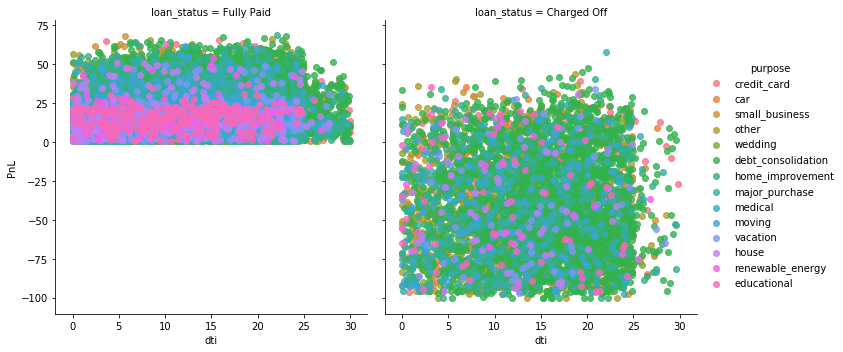

<Figure size 1080x1080 with 0 Axes>

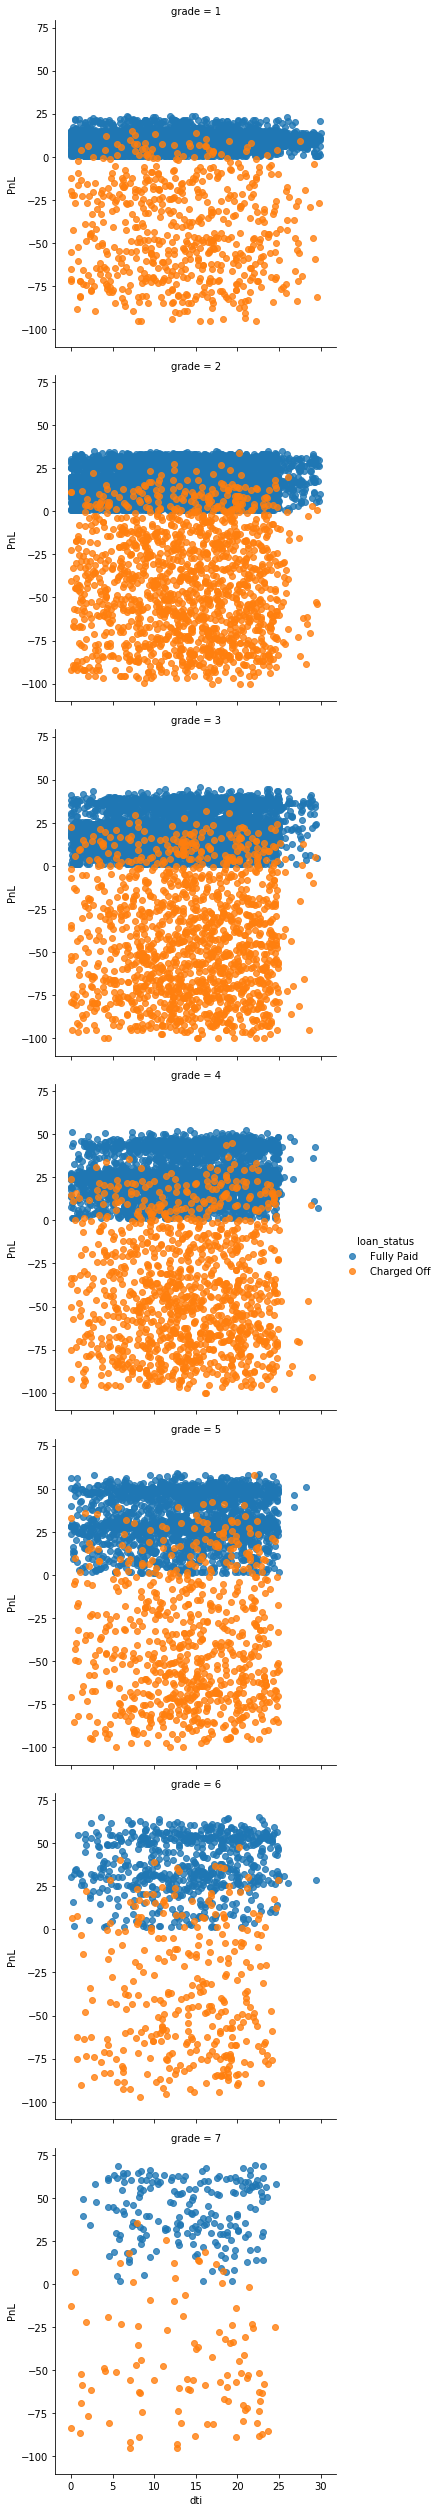

<Figure size 1080x1080 with 0 Axes>

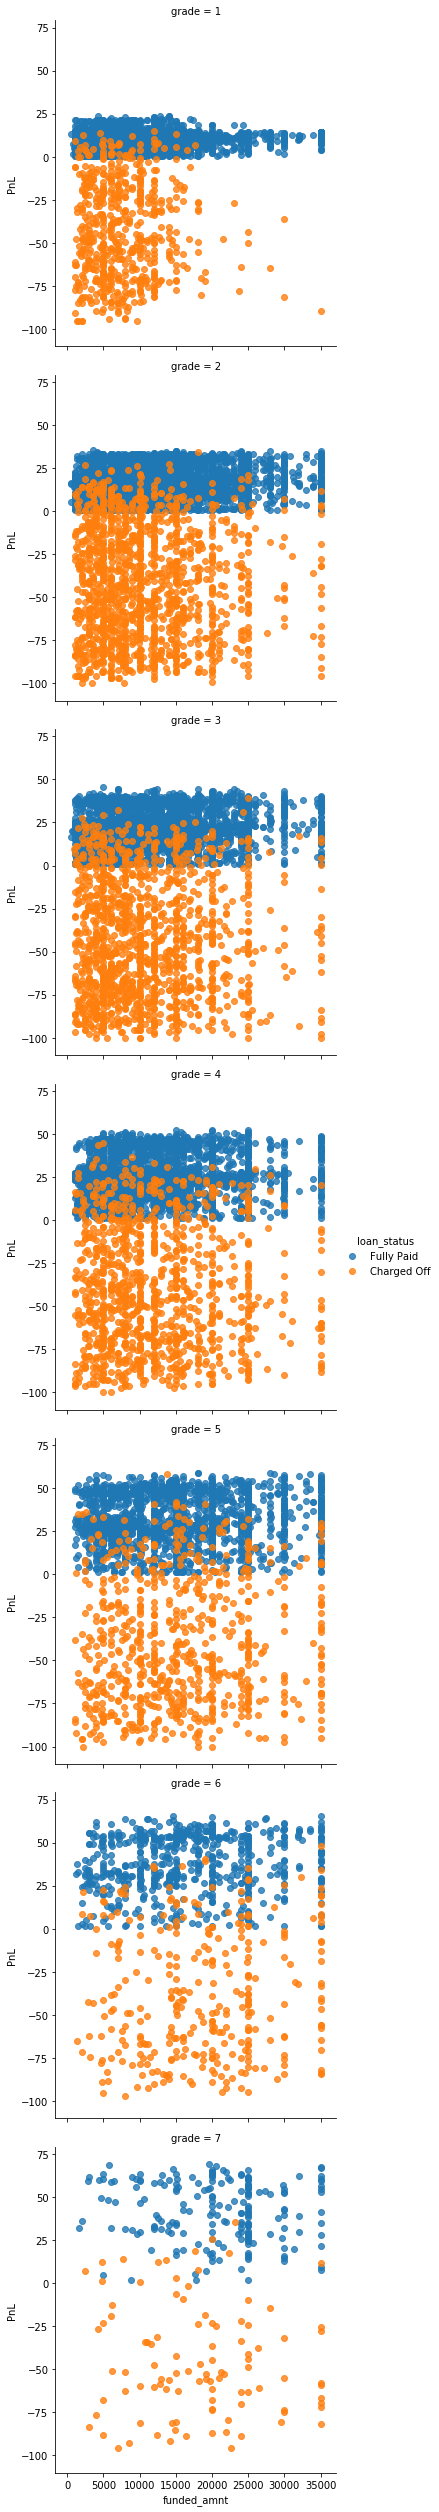

TypeError: lmplot() got an unexpected keyword argument 'brow'

<Figure size 1080x1080 with 0 Axes>

In [66]:
plt.figure(figsize=(15,15))

sns.lmplot(x='dti',y='PnL',col='loan_status',hue='purpose',fit_reg=False,data=loan)

plt.show()

plt.figure(figsize=(15,15))

sns.lmplot(x='dti',y='PnL',row='grade',hue='loan_status',fit_reg=False,data=loan)

plt.show()

plt.figure(figsize=(15,15))

sns.lmplot(x='funded_amnt',y='PnL',hue='loan_status',row='grade',fit_reg=False,data=loan)

plt.show()

plt.figure(figsize=(15,15))

sns.lmplot(x='inq_last_6mths',y='PnL',hue='loan_status',brow='grade',fit_reg=False,data=loan)

plt.show()

<Figure size 1080x3240 with 0 Axes>

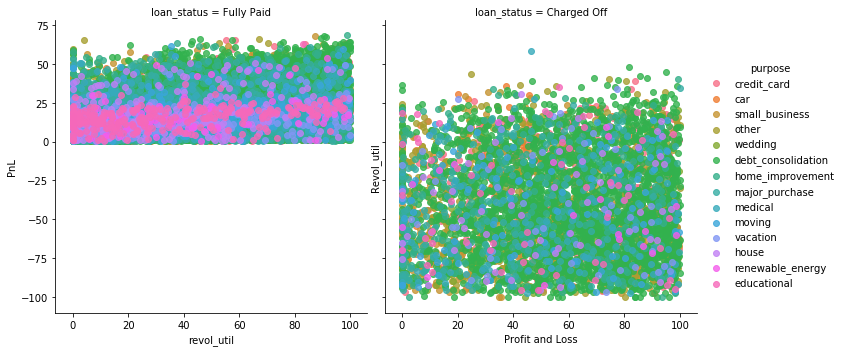

In [67]:
plt.figure(figsize=(15,45))


sns.lmplot(x='revol_util',y='PnL',col='loan_status',hue='purpose',fit_reg=False,data=loan)
plt.ylabel("Revol_util")
plt.xlabel("Profit and Loss")

plt.show()

In [68]:
D1=loan.groupby(['home_ownership','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

#  Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan.home_ownership.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
D2=pd.DataFrame(default_purpose)

#  Merging default dataframe with median and mad
D1=loan.groupby(['home_ownership']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan.groupby(['home_ownership','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan.home_ownership.dropna().unique():
    median_profitability[name]={}
    for gr in loan.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

                median        mad default_rate
home_ownership                                
MORTGAGE         13.80  15.585083         13.7
OWN              13.30  16.306257         14.9
RENT             15.54  16.993064         15.4
OTHER            15.10  17.482070         18.4
NONE             13.97   1.055556          NaT
    RENT     OWN  MORTGAGE  OTHER    NONE
1  10.48  10.170     9.990  12.78    12.4
2  16.16  16.085    16.280  15.54  14.765
3  20.54  20.100    20.730     20     NaT
4  23.52  21.710    23.220  23.02     NaT
5  26.29  27.280    26.930  19.19     NaT
6  27.15  22.840    28.950    0.3     NaT
7  29.71 -24.790    30.915    NaT     NaT


In [69]:
D1=loan.groupby(['addr_state','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

#  Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan.addr_state.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
        
D2=pd.DataFrame(default_purpose)

#  Merging default dataframe with median and mad
D1=loan.groupby(['addr_state']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan.groupby(['addr_state','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan.addr_state.dropna().unique():
    median_profitability[name]={}
    for gr in loan.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

            median        mad default_rate
addr_state                                
WY          16.770   9.343334            5
DC          15.970  10.993906          7.1
MS          17.500  14.312742         10.5
DE          15.960  14.351265         10.6
VT          13.830  14.917116         11.3
AR          13.790  13.851591         11.5
TN          15.240  11.130035         11.8
TX          15.010  14.308910         11.9
KS          14.310  14.546609         12.2
WV          16.260  15.188758         12.2
MA          14.170  14.284620         12.3
PA          14.425  14.378960         12.3
AL          15.010  13.936566         12.4
LA          14.620  13.836614         12.4
CO          14.275  14.393996         12.8
VA          14.620  14.185082         12.9
CT          14.310  15.168996         12.9
RI          13.890  13.831458         12.9
OH          15.440  15.966667         13.2
MT          12.690  15.262317         13.3
IL          15.400  15.273398         13.3
MN         

In [70]:
D1=loan.groupby(['verification_status','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

#  Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan.verification_status.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
        
D2=pd.DataFrame(default_purpose)

#  Merging default dataframe with median and mad
D1=loan.groupby(['verification_status']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan.groupby(['verification_status','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan.verification_status.dropna().unique():
    median_profitability[name]={}
    for gr in loan.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

                     median        mad  default_rate
verification_status                                 
Not Verified         13.860  14.185395          12.8
Source Verified      14.310  16.809371          14.8
Verified             16.095  18.820224          16.8
   Verified  Source Verified  Not Verified
1    10.410            9.830         10.36
2    16.520           16.160         16.14
3    20.960           20.755         20.07
4    23.470           23.980         22.74
5    26.665           27.280         26.01
6    28.705           29.725         26.26
7    29.640           29.160         25.83
